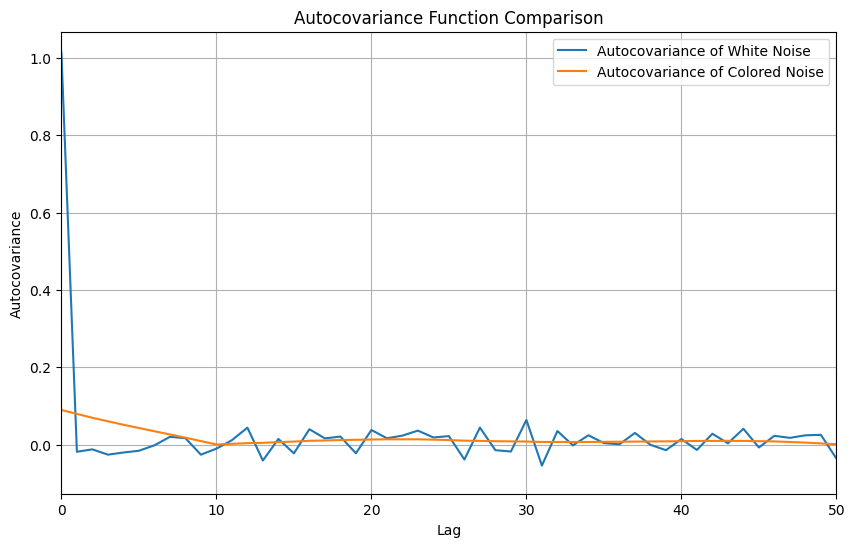

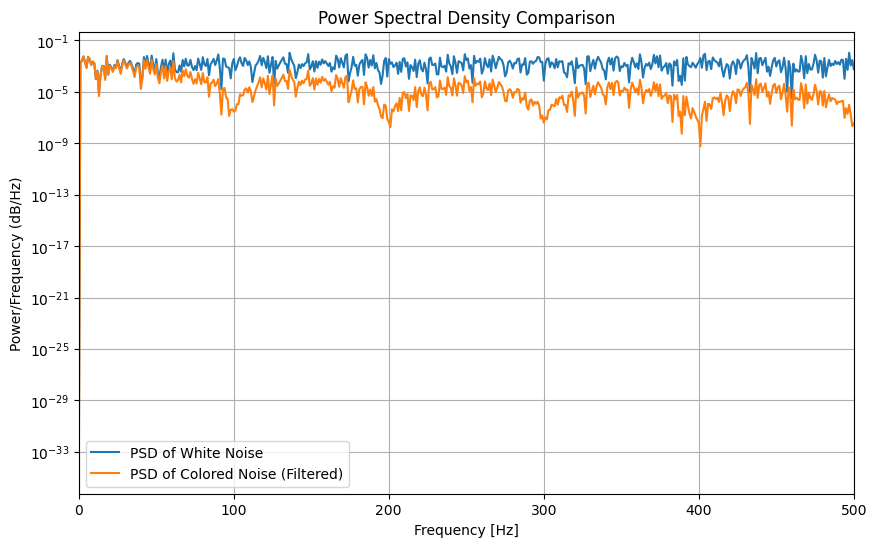

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram, lfilter

# Parameters for WGN
N = 1000 # Number of samples
fs = 1000 # Sampling frequency for PSD
mean_val = 0.0
std_dev = 1.0

# Generate White Gaussian Noise
white_noise = np.random.normal(loc=mean_val, scale=std_dev, size=N)

# --- FIR Filtering for Colored Noise and Autocovariance Analysis ---
# Define FIR filter coefficients (e.g., a simple moving average as a low-pass filter)
# This filter will "color" the white noise
fir_coeffs = np.ones(10) / 10 # 10-tap moving average filter

# Filter white noise to create colored noise (low-pass filtered white noise)
colored_noise = lfilter(fir_coeffs, [1.0], white_noise)

# Autocovariance function (adapted from lab manual's autocorrelation concept)
def autocovariance(x):
    x_centered = x - np.mean(x)
    # Compute cross-correlation of the centered signal with itself
    acov = np.correlate(x_centered, x_centered, mode='full')
    # Return values for non-negative lags, normalized by N (biased estimator)
    return acov[acov.size // 2:] / len(x)

# Analyze autocovariance for both signals
acov_white = autocovariance(white_noise)
acov_colored = autocovariance(colored_noise)

# Plotting Autocovariance functions
plt.figure(figsize=(10, 6))
plt.plot(acov_white, label='Autocovariance of White Noise')
plt.plot(acov_colored, label='Autocovariance of Colored Noise')
plt.title('Autocovariance Function Comparison')
plt.xlabel('Lag')
plt.ylabel('Autocovariance')
plt.grid(True)
plt.legend()
plt.xlim(0, 50) # Zoom in on relevant lags for better visualization
plt.show()

# --- Power Spectral Density (PSD) Estimation ---
# Estimate PSD using the Periodogram method for both signals
f_white, Pxx_white = periodogram(white_noise, fs=fs)
f_colored, Pxx_colored = periodogram(colored_noise, fs=fs)

# Plotting PSDs
plt.figure(figsize=(10, 6))
plt.semilogy(f_white, Pxx_white, label='PSD of White Noise')
plt.semilogy(f_colored, Pxx_colored, label='PSD of Colored Noise (Filtered)')
plt.title('Power Spectral Density Comparison')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.legend()
plt.xlim(0, fs / 2) # Plot up to Nyquist frequency
plt.show()
